In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('train_PDjVQMB.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


In [4]:
df.isnull().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

In [5]:
df.shape

(6650, 11)

#### Observation : There are 10 dependent variables, also there is no null values in data

In [6]:
df.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [7]:
df['Income'].value_counts()

10L - 15L        1885
5L - 10L         1847
Less than 5L     1573
More than 15L    1345
Name: Income, dtype: int64

In [8]:
df['Product_Holdings'].value_counts()

1     3200
2     3182
3+     268
Name: Product_Holdings, dtype: int64

In [9]:
df['Credit_Category'].value_counts()

Poor       3076
Average    2043
Good       1531
Name: Credit_Category, dtype: int64

In [10]:
df.ID.nunique()

6650

### EDA

([<matplotlib.patches.Wedge at 0x220e1d24850>,
 [Text(-0.7469610920697658, -0.8412336934133957, '0'),
  Text(0.7469610526887737, 0.8412337283811672, '1')],
 [Text(-0.514573196759172, -0.5795165443514504, '76.9%'),
  Text(0.5145731696300441, 0.5795165684403595, '23.1%')])

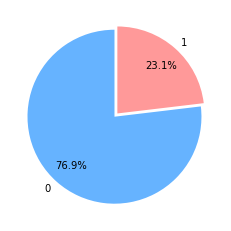

In [11]:
plt.pie(df['Is_Churn'].value_counts(),labels=df['Is_Churn'].value_counts().index,
        colors = ['#66b3ff','#ff9999'],
        startangle=90,
        autopct='%1.1f%%',
        pctdistance=0.75,
        explode = (0.025,0.025))

#### Observation : From above we can see that, dependent variable is imbalanced. Percentage of customer IS_churn and Not_churn is imbalanced

EDA to perform :
1. check IS_Churn with differentiation of Gender
2. check IS_Churn with differentiation of Credit category
3. check IS_Churn with differentiation of Income
4. check IS_Churn with differentiation of Vintage
5. check IS_Churn with differentiation of Transcation Status
6. check IS_Churn with differentiation of Credit_Card
7. check IS_Churn with differentiation of Product category
8. Is there any relation between gender and balance
9. is there any relation between income, balance and Is_Churn


<AxesSubplot:xlabel='Is_Churn', ylabel='count'>

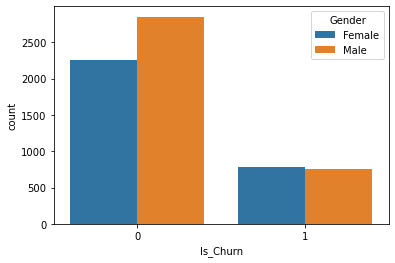

In [12]:
sns.countplot(x=df['Is_Churn'],data=df,hue='Gender',)

<AxesSubplot:xlabel='Is_Churn', ylabel='count'>

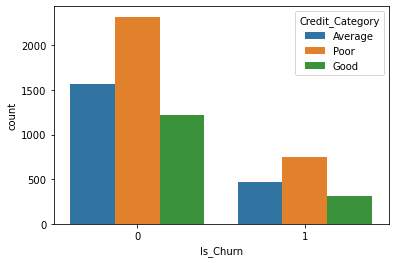

In [13]:
sns.countplot(x=df['Is_Churn'],data=df,hue='Credit_Category')

<AxesSubplot:xlabel='Is_Churn', ylabel='count'>

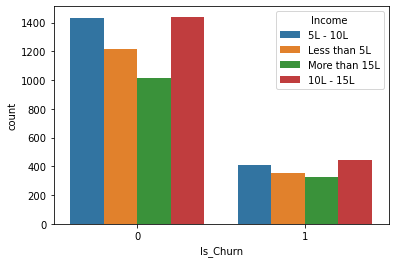

In [14]:
sns.countplot(x=df['Is_Churn'],data=df,hue='Income')

<AxesSubplot:xlabel='Is_Churn', ylabel='count'>

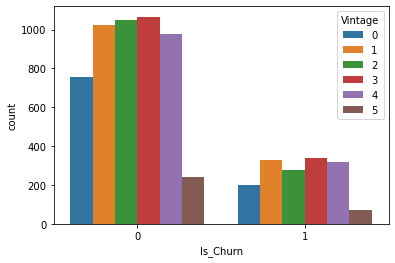

In [15]:
sns.countplot(x=df['Is_Churn'],data=df,hue='Vintage')

<AxesSubplot:xlabel='Is_Churn', ylabel='count'>

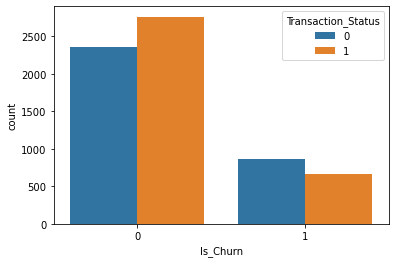

In [16]:
sns.countplot(x=df['Is_Churn'],data=df,hue='Transaction_Status')

<AxesSubplot:xlabel='Is_Churn', ylabel='count'>

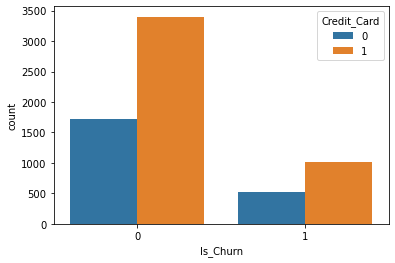

In [17]:
sns.countplot(x=df['Is_Churn'],data=df,hue='Credit_Card')

<AxesSubplot:xlabel='Is_Churn', ylabel='count'>

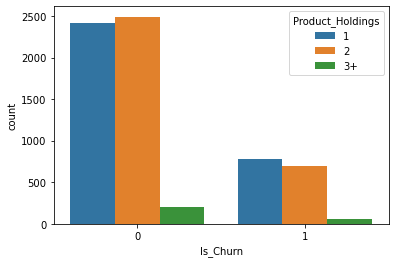

In [18]:
sns.countplot(x=df['Is_Churn'],data=df,hue='Product_Holdings')

<AxesSubplot:xlabel='Income', ylabel='Balance'>

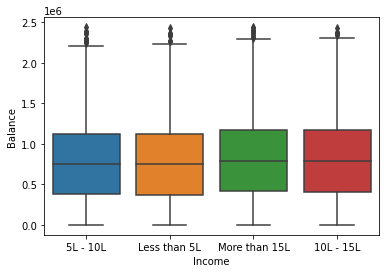

In [19]:
sns.boxplot(x='Income', y='Balance',data=df)
#plt.tick_params()
#plt.ticklabel_format(style='plain')

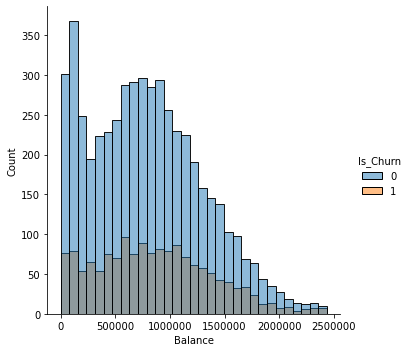

In [20]:
sns.displot(data=df,x='Balance',hue='Is_Churn')
plt.ticklabel_format(style='plain')

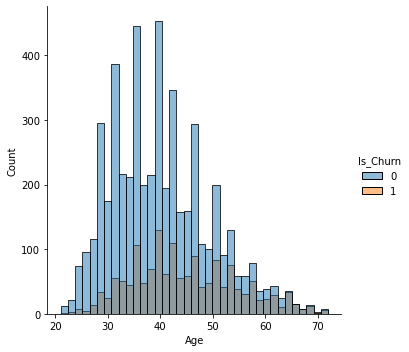

In [21]:
sns.displot(data=df,x='Age',hue='Is_Churn')

In [22]:
df['ID'].nunique()

6650

In [23]:
df[df['Is_Churn']>0].groupby(['Income']).sum('Balance')

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
Income,,,,,,
10L - 15L,20013,4.051669e+08,1037,202,294,444
5L - 10L,18266,3.420910e+08,948,170,278,412
Less than 5L,15862,2.905778e+08,783,151,225,354
More than 15L,14623,2.803369e+08,773,148,223,327


#### Observation : Max number of customers having income range between 10L to 15L are churn out

In [24]:
df[df['Is_Churn']>0].groupby(['Income']).max('Balance')

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
Income,,,,,,
10L - 15L,71,2424060.81,5,1,1,1
5L - 10L,72,2381976.81,5,1,1,1
Less than 5L,71,2361625.47,5,1,1,1
More than 15L,71,2402199.81,5,1,1,1


In [25]:
df[df['Is_Churn']>0].groupby(['Income']).min('Balance')

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
Income,,,,,,
10L - 15L,22,10998.0,0,0,0,1
5L - 10L,22,1017.0,0,0,0,1
Less than 5L,23,9252.0,0,0,0,1
More than 15L,23,8001.0,0,0,0,1


In [26]:
df[df['Is_Churn']<1].groupby(['Income']).max('Balance')

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
Income,,,,,,
10L - 15L,72,2375352.81,5,1,1,0
5L - 10L,71,2436615.81,5,1,1,0
Less than 5L,71,2421909.81,5,1,1,0
More than 15L,71,2436435.81,5,1,1,0


In [27]:
df[df['Is_Churn']<1].groupby(['Income']).min('Balance')

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
Income,,,,,,
10L - 15L,23,63.0,0,0,0,0
5L - 10L,21,333.0,0,0,0,0
Less than 5L,22,711.0,0,0,0,0
More than 15L,21,369.0,0,0,0,0


#### Observation : Minimum balance of customer who are churn is : greater than 1000

In [28]:
df[df['Is_Churn']>0].groupby(['Credit_Card']).count()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Category,Is_Churn
Credit_Card,,,,,,,,,,
0,517,517,517,517,517,517,517,517,517,517
1,1020,1020,1020,1020,1020,1020,1020,1020,1020,1020


In [29]:
df[df['Is_Churn']==0].groupby(['Credit_Card']).count()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Category,Is_Churn
Credit_Card,,,,,,,,,,
0,1715,1715,1715,1715,1715,1715,1715,1715,1715,1715
1,3398,3398,3398,3398,3398,3398,3398,3398,3398,3398


In [30]:
df[df['Is_Churn']==1]['Vintage'].value_counts()

3    339
1    328
4    321
2    276
0    201
5     72
Name: Vintage, dtype: int64

In [31]:
df[df['Is_Churn']==0]['Vintage'].value_counts()

3    1066
2    1052
1    1026
4     975
0     755
5     239
Name: Vintage, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Vintage'>

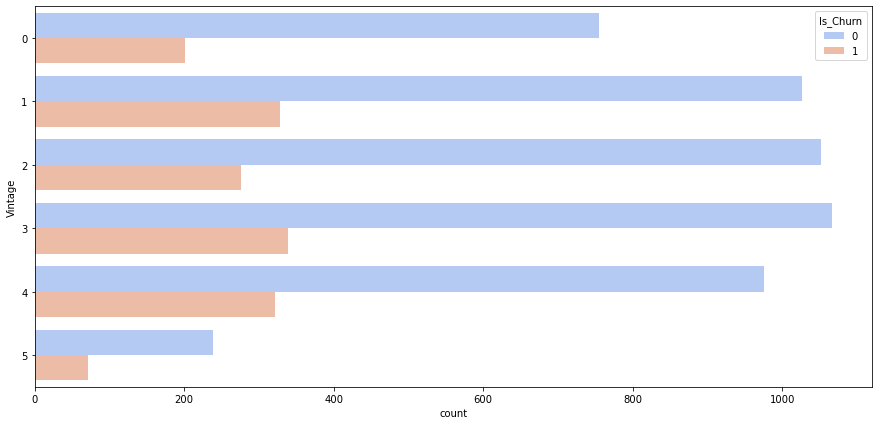

In [32]:
plt.figure(figsize=(15,7))
sns.countplot(y=df['Vintage'],hue='Is_Churn',data=df,palette='coolwarm')

#### Observation:  for Income, Product_Holdings, Credit_Category will apply label encoding as we can apply ordinal mapping as well

In [33]:
df['Gender']=df['Gender'].map({'Female':1,'Male':0})

In [34]:
 df['Income']=df['Income'].map({'Less than 5L':1,'5L - 10L':2,'10L - 15L':3,'More than 15L':4})

In [35]:
df['Product_Holdings']=df['Product_Holdings'].map({'1':1,'2':2,'3+':3})

In [36]:
df['Credit_Category']=df['Credit_Category'].map({'Poor':1,'Average':2,'Good':3})

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [38]:
le.fit(df['ID'])

LabelEncoder()

In [39]:
df['ID']=le.transform(df['ID'])

#### We transfrom all values to integer, model understandable values

<AxesSubplot:>

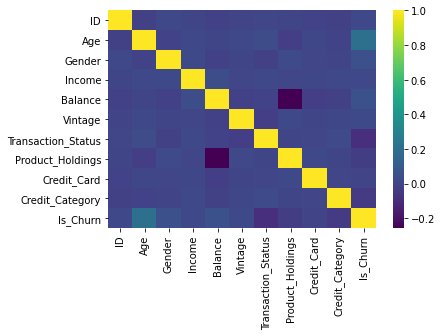

In [40]:
sns.heatmap(df.corr(),cmap='viridis')

<AxesSubplot:xlabel='Income', ylabel='Is_Churn'>

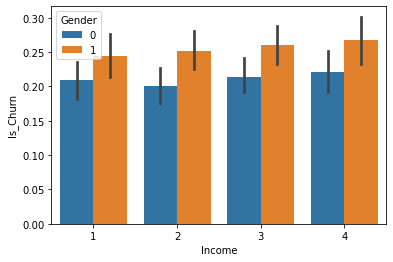

In [41]:
sns.barplot(x='Income',y='Is_Churn',data=df,hue='Gender')

In [42]:
 from imblearn.over_sampling import RandomOverSampler

In [43]:
os=RandomOverSampler()

In [44]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [45]:
X=df.drop('Is_Churn',axis=1)
y=df['Is_Churn']

#### From ExtraTree Classifer, we learn that Gender and Transaction History are less correlated, so drop the these 2 features

In [46]:
X.drop(['Gender','Transaction_Status'],axis=1,inplace=True)

In [47]:
X

,ID,Age,Income,Balance,Vintage,Product_Holdings,Credit_Card,Credit_Category
0,3444,36,2,563266.44,4,1,0,2
1,2246,53,1,875572.11,2,1,1,1
2,3691,35,4,701607.06,2,2,0,1
3,5094,43,4,1393922.16,0,2,1,1
4,3884,39,4,893146.23,1,1,1,3
...,...,...,...,...,...,...,...,...
6645,4373,61,2,1354526.19,4,2,1,1
6646,543,42,2,596286.54,3,2,1,2
6647,5481,29,1,979298.19,2,2,0,1
6648,2255,66,3,395233.65,3,2,1,1


In [48]:
y

0       1
1       0
2       0
3       1
4       1
       ..
6645    1
6646    0
6647    0
6648    1
6649    0
Name: Is_Churn, Length: 6650, dtype: int64

In [49]:
X_train_res, y_train_res = os.fit_sample(X, y)

In [50]:
y_train_res.value_counts()

0    5113
1    5113
Name: Is_Churn, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.33, random_state=42)

In [57]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,CategoricalNB,ComplementNB,MultinomialNB

In [58]:
from sklearn.ensemble import ExtraTreesClassifier
selection = ExtraTreesClassifier()
selection.fit(X_train, y_train)

ExtraTreesClassifier()

In [59]:
print(selection.feature_importances_)

[0.22574444 0.23982032 0.08439042 0.22795667 0.11148349 0.03852427
 0.02685927 0.04522112]


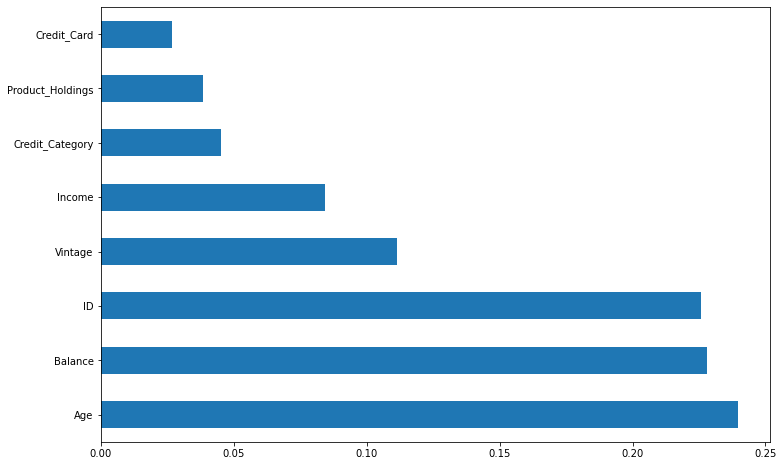

In [60]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [61]:
error_rate=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    ypredd=knn.predict(X_test)
    error_rate.append(np.mean(y_test!=ypredd))

Text(0, 0.5, 'Error Rate')

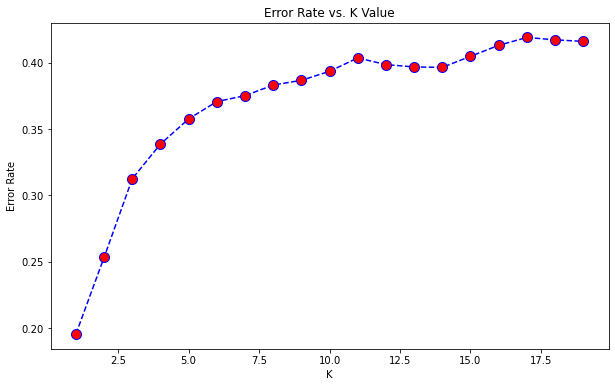

In [62]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [63]:
#def build_models(X,y):
models=[]


 
lr = LogisticRegression()
lr.fit(X_train,y_train)
print("LR fitted")   
models.append(lr)

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
models.append(knn)

dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
models.append(dtree)

rf=RandomForestClassifier()
rf.fit(X_train,y_train)
models.append(rf)
    
SGDClf = SGDClassifier(max_iter = 1000, tol=1e-3,penalty = "elasticnet")
SGDClf.fit(X_train,y_train)
models.append(SGDClf)

gnb=GaussianNB()
gnb.fit(X_train,y_train)
models.append(gnb)

mnb=MultinomialNB()
mnb.fit(X_train,y_train)
models.append(mnb)

cnb=CategoricalNB()
cnb.fit(X_train,y_train)
models.append(cnb)

bnb=BernoulliNB()
bnb.fit(X_train,y_train)
models.append(bnb)

complement_nb=ComplementNB()
complement_nb.fit(X_train,y_train)
models.append(complement_nb)
    #return models
models

LR fitted


[LogisticRegression(),
 KNeighborsClassifier(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 SGDClassifier(penalty='elasticnet'),
 GaussianNB(),
 MultinomialNB(),
 CategoricalNB(),
 BernoulliNB(),
 ComplementNB()]

In [64]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,classification_report

In [67]:
def model_evaluatio(models,X_test,y_test):
    
    model_nm = ['LogisticsRegression','KNN','Decision_Tree','Random_Forest','SGD_Classifier','GaussianNB','MultinomialNB','CategoricalNB','BernoulliNB','ComplementNB']
    metrics = ['Precision','Recall','F1 score']
    indx=pd.MultiIndex.from_product([model_nm, metrics],
                           names=['Models', 'Metrics'])
    output_df=pd.DataFrame(index=indx,columns=['Is_Churn','Not Churn','macro avg','weighted avg'])
    dict_report={}
    for nm,model in zip(model_nm,models):
        #if nm!='CategoricalNB':
        pred=model.predict(X_test)
        dict_report=classification_report(y_test,pred,output_dict=True)
        #print(nm)
        #print(dict_report)
        output_df.loc[nm,'Precision']['Is_Churn']=dict_report['1']['precision']
        output_df.loc[nm,'Recall']['Is_Churn']=dict_report['1']['recall']
        output_df.loc[nm,'F1 score']['Is_Churn']=dict_report['1']['f1-score']

        output_df.loc[nm,'Precision']['Not Churn']=dict_report['0']['precision']
        output_df.loc[nm,'Recall']['Not Churn']=dict_report['0']['recall']
        output_df.loc[nm,'F1 score']['Not Churn']=dict_report['0']['f1-score']

        output_df.loc[nm,'Precision']['macro avg']=dict_report['macro avg']['precision']
        output_df.loc[nm,'Recall']['macro avg']=dict_report['macro avg']['recall']
        output_df.loc[nm,'F1 score']['macro avg']=dict_report['macro avg']['f1-score']

        output_df.loc[nm,'Precision']['weighted avg']=dict_report['weighted avg']['precision']
        output_df.loc[nm,'Recall']['weighted avg']=dict_report['weighted avg']['recall']
        output_df.loc[nm,'F1 score']['weighted avg']=dict_report['weighted avg']['f1-score']

    return output_df
        
        

In [68]:
output_df=model_evaluatio(models,X_test,y_test)
output_df

C:\Users\shiva\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Is_Churn Not Churn macro avg weighted avg
Models              Metrics                                             
LogisticsRegression Precision  0.508096  0.538532  0.523314     0.523526
                    Recall     0.697716  0.343074  0.520395     0.517926
                    F1 score   0.587997  0.419136  0.503566     0.502391
KNN                 Precision   0.61724  0.676718  0.646979     0.647393
                    Recall     0.722957  0.563998  0.643477      0.64237
                    F1 score   0.665929  0.615237  0.640583      0.64023
Decision_Tree       Precision  0.770264  0.915689  0.842976     0.843989
                    Recall     0.930889  0.729982  0.830436     0.829037
                    F1 score   0.842993  0.812358  0.827675     0.827462
Random_Forest       Precision  0.846927  0.906625  0.876776     0.877192
                    Recall     0.911058   0.83986  0.875459     0.874963
                    F1 score   0.877823  0.871966  0.874894     0.874854
SGD_Classifier      Precision       0.0  0.506963  0.253481     0.257011
                    Recall          0.0       1.0       0.5     0.506963
                    F1 score        0.0  0.672827  0.336414     0.341099
GaussianNB          Precision  0.588276  0.578701  0.583489     0.583422
                    Recall      0.51262  0.651081  0.581851     0.582815
                    F1 score   0.547848  0.612761  0.580305     0.580757
MultinomialNB       Precision  0.510191  0.522779  0.516485     0.516573
                    Recall     0.496394  0.536528  0.516461     0.516741
                    F1 score   0.503198  0.529564  0.516381     0.516565
CategoricalNB       Precision   0.68446  0.929658  0.807059     0.808766
                    Recall     0.955529  0.571596  0.763562     0.760889
                    F1 score   0.797592  0.707926  0.752759     0.752135
BernoulliNB         Precision  0.505208  0.523024  0.514116      0.51424
                    Recall     0.582933  0.444769  0.513851     0.512889
                    F1 score   0.541295  0.480733  0.511014     0.510592
ComplementNB        Precision  0.510191  0.522779  0.516485     0.516573
                    Recall     0.496394  0.536528  0.516461     0.516741
                    F1 score   0.503198  0.529564  0.516381     0.516565

### test.csv

In [69]:
df_test_data=pd.read_csv('test_lTY72QC.csv')

In [70]:
df_test_data.shape

(2851, 10)

In [71]:
df_test_data['Gender']=df_test_data['Gender'].map({'Female':1,'Male':0})
df_test_data['Income']=df_test_data['Income'].map({'Less than 5L':1,'5L - 10L':2,'10L - 15L':3,'More than 15L':4})
df_test_data['Product_Holdings']=df_test_data['Product_Holdings'].map({'1':1,'2':2,'3+':3})
df_test_data['Credit_Category']=df_test_data['Credit_Category'].map({'Poor':1,'Average':2,'Good':3})

In [72]:
from sklearn.preprocessing import LabelEncoder
le_test=LabelEncoder()

In [73]:
le_test.fit(df_test_data['ID'])

LabelEncoder()

In [74]:
df_test_data['ID']=le_test.transform(df_test_data['ID'])

In [75]:
df_test_data['ID']

0        964
1       1745
2       1856
3       1991
4       2448
        ... 
2846     280
2847     930
2848    2756
2849    2683
2850     598
Name: ID, Length: 2851, dtype: int32

In [76]:
df_test_data.drop(['Gender','Transaction_Status'],axis=1,inplace=True)

In [90]:
#y_pred=rf.predict(df_test_data)

In [100]:
y_pred=gnb.predict(df_test_data)

In [78]:
output=pd.DataFrame()

In [79]:
ID=le_test.inverse_transform(df_test_data['ID'])

In [80]:
ID

array(['55480787', '9aededf2', 'a5034a09', ..., 'f708121b', 'f008715d',
       '36b81f59'], dtype=object)

In [101]:
output['ID']=ID
output['Is_Churn']=y_pred

In [102]:
output

,ID,Is_Churn
0,55480787,1
1,9aededf2,0
2,a5034a09,0
3,b3256702,0
4,dc28adb5,1
...,...,...
2846,19e40adf,1
2847,52d5bc8d,1
2848,f708121b,1
2849,f008715d,1


In [103]:
count=0
list(y_pred)
for i in y_pred:
    if i<0:
        count+=1
count

0

In [104]:
output.to_csv('Final_result.csv',index=False)